<a href="https://colab.research.google.com/github/g20diplo2024/Analisis-y-visualizacion/blob/main/Entregable_Grupo_20_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2024**

---
## Trabajo práctico entregable - Parte 1

Grupo de Trabajo nº 20

Integrantes:
*   Gabriela Artazo
*   Pablo Iribarren
*   Julia Martin
*   Daniela Paira

## **Diagrama de flujo de trabajo:**


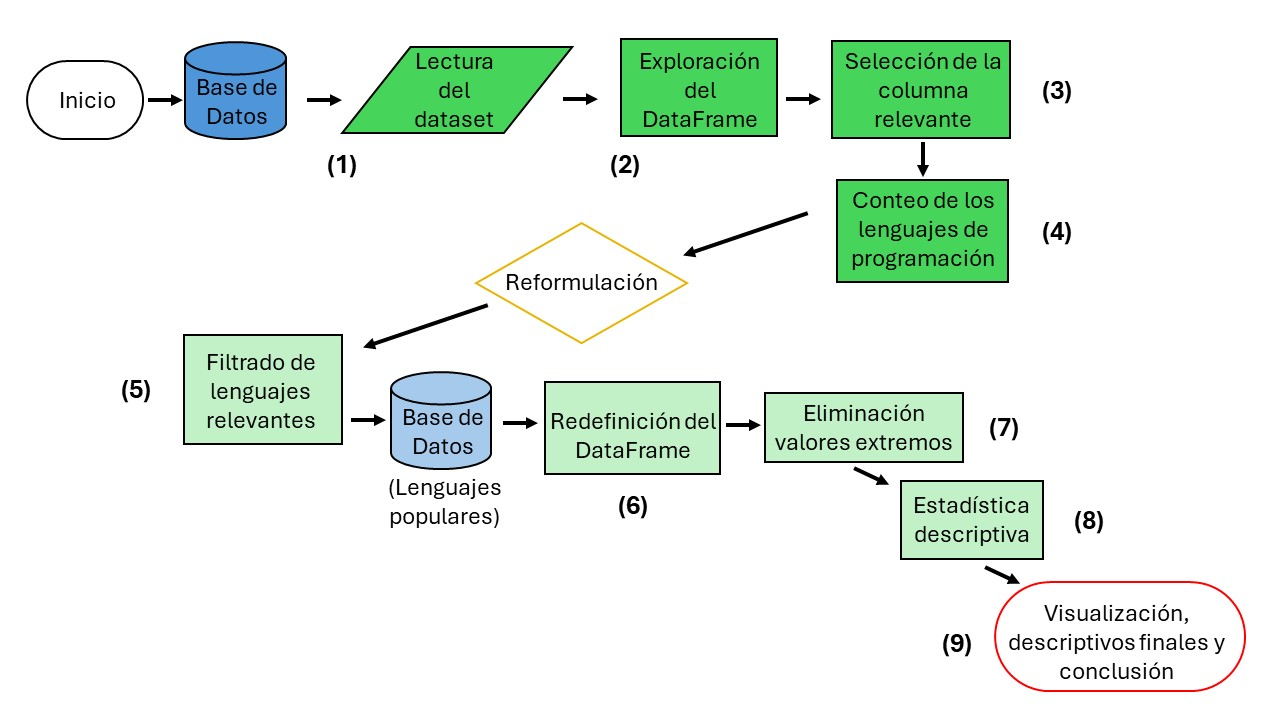



# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 100000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

Importamos las principales librerias con las que vamos a trabajar

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## **1) Base de Datos y Lectura del dataset**

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

# **2) Exploración del Data Frame**

In [ ]:
df[:5]

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.00,520000.00,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.00,520000.00,NaN,NaN,No,No recibo bono,...,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.00,104000.00,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis
3,Argentina,Chaco,Part-Time,Staff (planta permanente),190000.00,240000.00,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,Mujer Cis
4,Argentina,Chaco,Full-Time,Tercerizado (trabajo a través de consultora o ...,250000.00,207000.00,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Varón Cis


In [ ]:
df.columns
#Para ver el nombre todas las columnas, para luego evaluar si hay que cambiar nombre y seleccionar columnas de interes

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'salary_in_usd', 'salary_last_dollar_value', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       '¿En qué mes fue el último ajuste?', 'salary_comparison_last_semester',
       '¿Contás con beneficios adicionales?', 'salary_satisfaction',
       'Trabajo de', 'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'tools_platform', 'tools_programming_languages', 'tools_frameworks',
       'tools_data_bases', 'tools_qa_testing', 'company_employee_number',
       'work_work_modality',
       'Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended',
       '¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?

# **3) Selección de columnas relevantes**

In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO']

***Para futuros análisis seria interesante*** incluir las siguientes columnas por preguntas que emergieron tras esta primera exploración:

*   'salary_in_usd', 'profile_age','profile_gender',
 'profile_studies_level', 'salary_on_call_duty_charge''work_years_in_current_position'

1.   Generalmente cuando se analizan salarios y variables correlacionadas al aumento o disminución del mismo, la incidencia de la variable género y edad admitiría identificar si el mercado laboral de la programación emplea mayormente gente con experiencia  o bien se centra en la calificación y el saber experto. Es por esto que variables como 'profile_age'o'profile_studies_level'serian relevantes. Por otro lado, incluir análisis de equidad de género en aumento o disminución de salarios es altamente valorado en estudios de este tipo.
2.   Al explorar el conjunto de datos, hemos observado una correlación significativa entre el aumento o disminución del salario y la condición laboral de trabajar a tiempo completo o realizar guardias. Esta observación nos lleva a hipotetizar que es posible que esté ocurriendo una precarización en el mercado laboral hispanoparlante. Estudios previos han indicado que en Europa o Estados Unidos, la lógica es inversa: a mayor calificación requerida en el empleo, mayor salario y mayor capacidad del trabajadore para decidir entre trabajar a tiempo completo o a tiempo parcial.




# **4) Conteo de frecuencias de los lenguajes de programación**

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df.tools_programming_languages[:10]

0                                   Bash/Shell, Python
1    Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...
2              SQL, Oracle APEX, PL-SQL, SQL Developer
3                                                 ABAP
4                                                 Java
5                                          Python, SQL
6                    CSS, HTML, Javascript, TypeScript
7                                                  SQL
8                    Bash/Shell, HTML, Javascript, PHP
9                                HTML, Javascript, PHP
Name: tools_programming_languages, dtype: object

In [ ]:
# Contar la frecuencia de cada valor en la columna 'tools_programming_languages'
frecuencias = df['tools_programming_languages'].value_counts()

# Mostrar las respuestas más frecuentes
print("Respuestas más frecuentes en la columna 'tools_programming_languages':")
print(frecuencias[:10])


Respuestas más frecuentes en la columna 'tools_programming_languages':
tools_programming_languages
Ninguno de los anteriores            911
SQL                                  253
Python                               208
Python, SQL                          193
CSS, HTML, Javascript, TypeScript    118
Bash/Shell, Python                   115
Java                                 109
Javascript                            85
Javascript, TypeScript                82
Java, SQL                             79
Name: count, dtype: int64


Antes de pasar al siguiente codigo, donde correctamente separan los lenguajes por comas, podemos observar que la respuesta **"Ninguna de las anteriores"** cuenta con un total de 911 casos, informacion que se pierde tras el desglose de la columna. Además seria la respuesta que queda en 7ª posición segñun el orden de frecuencias a posteriori

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages')

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:20]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,bash/shell,"Bash/Shell, Python",520000.00,"[bash/shell, python]"
0,python,"Bash/Shell, Python",520000.00,"[bash/shell, python]"
1,bash/shell,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.00,"[bash/shell, css, html, javascript, php, sql, ..."
1,css,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.00,"[bash/shell, css, html, javascript, php, sql, ..."
1,html,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.00,"[bash/shell, css, html, javascript, php, sql, ..."
1,javascript,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.00,"[bash/shell, css, html, javascript, php, sql, ..."
1,php,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.00,"[bash/shell, css, html, javascript, php, sql, ..."
1,sql,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.00,"[bash/shell, css, html, javascript, php, sql, ..."
1,typescript,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.00,"[bash/shell, css, html, javascript, php, sql, ..."
1,vba,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.00,"[bash/shell, css, html, javascript, php, sql, ..."


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

Este método # reset_index(drop=True) restablece el índice del DataFrame. Al pasar drop=True, se indica que el índice actual se descarte y se cree uno nuevo basado en la secuencia numérica predeterminada (0, 1, 2, ...). Esto elimina el índice anterior y lo reemplaza por uno nuevo.

Entonces #inplace=True: Este parámetro indica que la operación debe realizarse directamente en el DataFrame original, en lugar de devolver una copia del DataFrame modificado. Si inplace es True, el DataFrame original (df_lang en este caso) se actualizará con el nuevo índice. Si es False (o no se especifica), el método devuelve un nuevo DataFrame con el índice restablecido, pero no modifica el DataFrame original.

Esto pudo ser resuelto con la colaboración de nuestra mentora

In [ ]:
df_lang.reset_index(drop=True, inplace=True)
df_lang

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
0,bash/shell,"Bash/Shell, Python",520000.00,"[bash/shell, python]"
1,python,"Bash/Shell, Python",520000.00,"[bash/shell, python]"
2,bash/shell,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.00,"[bash/shell, css, html, javascript, php, sql, ..."
3,css,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.00,"[bash/shell, css, html, javascript, php, sql, ..."
4,html,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.00,"[bash/shell, css, html, javascript, php, sql, ..."
...,...,...,...,...
16317,sql,"Java, Javascript, SQL",1150000.00,"[java, javascript, sql]"
16318,java,"Java, SQL",525000.00,"[java, sql]"
16319,sql,"Java, SQL",525000.00,"[java, sql]"
16320,c#,"C#, SQL",160000.00,"[c#, sql]"


In [ ]:
# Para conocer los lenguajes de programación con mayor frecuencia
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,frequency,count
0,sql,2508
1,javascript,2282
2,html,1643
3,python,1623
4,css,1109
5,java,1075
6,typescript,1061
7,bash/shell,898
8,.net,688
9,php,668


PORQUE ELEGIMOS LOS 5 LENGUAJES MAS FRECUENTES

Relevancia en el mercado laboral: Los lenguajes de programación más frecuentes suelen ser aquellos que son altamente demandados en el mercado laboral. Por lo tanto, seleccionar los cinco más frecuentes puede proporcionar una visión significativa de las tendencias salariales en los campos más solicitados.

Utilidad y versatilidad: Algunos lenguajes de programación, como Python, SQL, JavaScript, HTML y CSS, son ampliamente utilizados en una variedad de industrias y aplicaciones. Esto los convierte en opciones sólidas para incluir en el análisis, ya que sus salarios pueden ser representativos de diferentes sectores y roles.

Tendencias de la industria: Observar los lenguajes de programación más frecuentes puede ofrecer información sobre las tendencias emergentes en la industria. Por ejemplo, si se observa un aumento en la frecuencia de un lenguaje en particular, puede indicar un crecimiento en su popularidad y demanda en el mercado laboral.

Facilidad de análisis y comparación: Al limitar el análisis a un número manejable de lenguajes de programación, facilita la comparación entre ellos y la interpretación de los resultados. Analizar demasiados lenguajes puede complicar el análisis y diluir las conclusiones.


# **5) Filtrado de lenguajes relevantes**

Este código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:
# Filtrado de lenguajes que queremos excluir
# Completamos con los 5 lenguajes mas frecuentes: "python", "sql", "javascript", "html", "css"
interesting_languages = ["python", "sql", "javascript", "html", "css"	]
filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:10]

,programming_language,tools_programming_languages,salary_monthly_NETO,cured_programming_languages
1,python,"Bash/Shell, Python",520000.00,"[bash/shell, python]"
3,css,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.00,"[bash/shell, css, html, javascript, php, sql, ..."
4,html,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.00,"[bash/shell, css, html, javascript, php, sql, ..."
5,javascript,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.00,"[bash/shell, css, html, javascript, php, sql, ..."
7,sql,"Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...",520000.00,"[bash/shell, css, html, javascript, php, sql, ..."
10,sql,"SQL, Oracle APEX, PL-SQL, SQL Developer",104000.00,"[sql, oracle, apex, pl-sql, sql, developer]"
14,sql,"SQL, Oracle APEX, PL-SQL, SQL Developer",104000.00,"[sql, oracle, apex, pl-sql, sql, developer]"
18,python,"Python, SQL",229000.00,"[python, sql]"
19,sql,"Python, SQL",229000.00,"[python, sql]"
20,css,"CSS, HTML, Javascript, TypeScript",250000.00,"[css, html, javascript, typescript]"


 **Interesting_languages** es una lista  que contiene los nombres de lenguajes de programación que consideramos de interes.

 **df_lang**[df_lang.programming_language.isin(interesting_languages)]
Esta expresión filtra el DataFrame df_lang para seleccionar solo las filas donde el valor de la columna "programming_language" se encuentra en la lista interesting_languages.
Filtered_df_lang: Es nuestro nuevo DataFrame resultante después de aplicar el filtro. Contiene solo las filas de df_lang donde el lenguaje de programación es uno de los lenguajes de la lista interesting_languages.


In [ ]:
print(filtered_df_lang.head())
#Para ver los titulos de las columnas

  programming_language                        tools_programming_languages  \
1               python                                 Bash/Shell, Python   
3                  css  Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...   
4                 html  Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...   
5           javascript  Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...   
7                  sql  Bash/Shell, CSS, HTML, Javascript, PHP, SQL, T...   

   salary_monthly_NETO                        cured_programming_languages  
1            520000.00                               [bash/shell, python]  
3            520000.00  [bash/shell, css, html, javascript, php, sql, ...  
4            520000.00  [bash/shell, css, html, javascript, php, sql, ...  
5            520000.00  [bash/shell, css, html, javascript, php, sql, ...  
7            520000.00  [bash/shell, css, html, javascript, php, sql, ...  


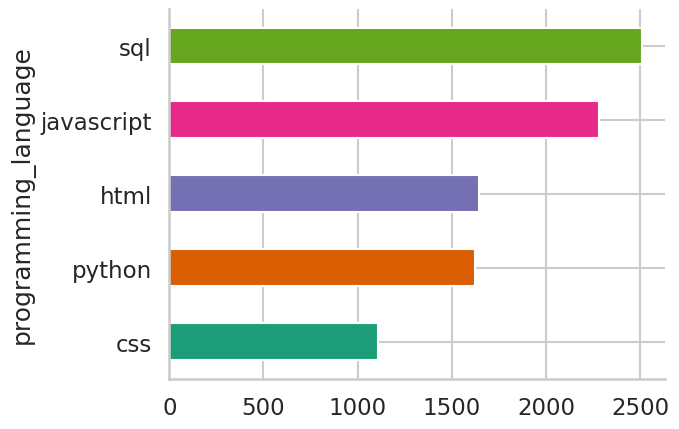

In [ ]:
# Agrupar y contar el tamaño de cada grupo
counts = filtered_df_lang.groupby('programming_language').size()

# Ordenar los valores de mayor a menor
counts = counts.sort_values(ascending=True)

# Crear el gráfico de barras horizontales
counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Eliminar los bordes superior y derecho del gráfico
plt.gca().spines[['top', 'right']].set_visible(False)

# Mostrar el gráfico
plt.show()

**En esta sección mostramos boxplots para visualizar la distribución de salarios para cada lenguaje de programación**. Usamos la biblioteca de Matplotlib y Seaborn para crear estas visualizaciones.
Estas 'cajas ploteadas' con puntos que caen fuera de los "bigotes" del boxplot pueden considerarse outliers. Estos "bigotes" se definen generalmente como 1.5 veces el rango intercuartílico (IQR) por encima del tercer cuartil y por debajo del primer cuartil. Por lo tanto, si bien este código no aplica filtros directamente, nos permite identificar visualmente la presencia de outliers en los datos de salario neto para cada lenguaje de programación.

<ipython-input-275-c95592627481>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df_lang, y='programming_language', x='salary_monthly_NETO',palette=palette)


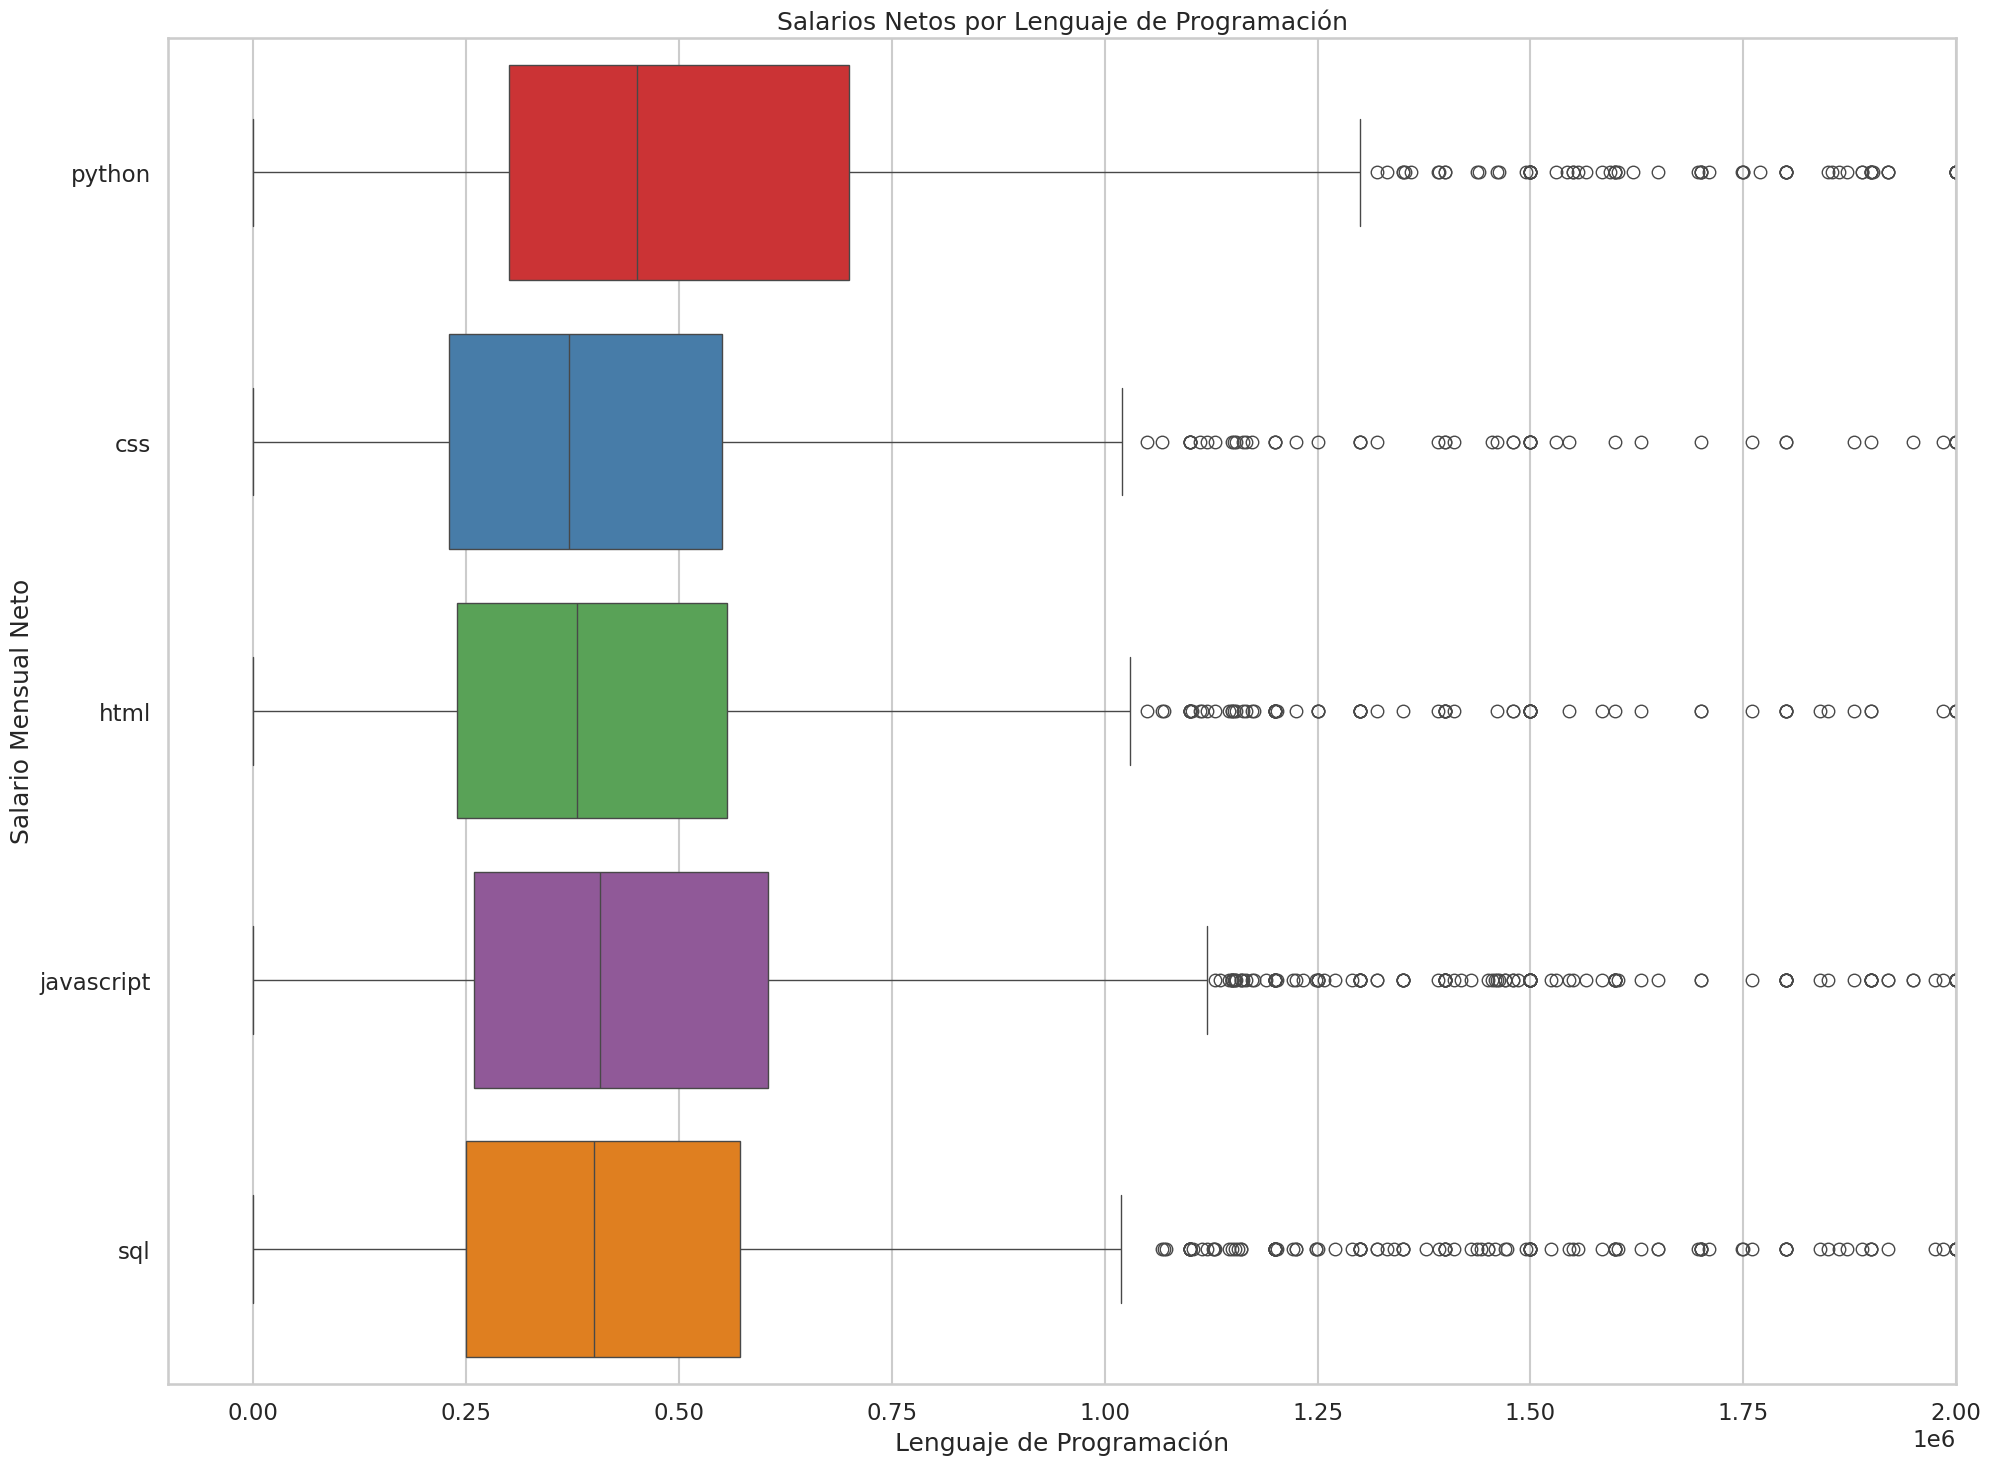

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Establecer el estilo de seaborn
palette = "Set1"
sns.set_style("whitegrid")

# Crear el gráfico de boxplot
plt.figure(figsize=(20, 15))
sns.boxplot(data=filtered_df_lang, y='programming_language', x='salary_monthly_NETO',palette=palette)

# Agregar título y etiquetas a los ejes
plt.title('Salarios Netos por Lenguaje de Programación')
plt.xlabel('Lenguaje de Programación')
plt.ylabel('Salario Mensual Neto')


# Mostrar el gráfico
plt.tight_layout()
plt.xlim(-100000, 2000000)
plt.show()


In [ ]:
# Obtenemos el rango de valores y otros estadisticos descriptivos observados para el total de los salarios Neto
minimo = df.salary_monthly_NETO.min()
maximo = df.salary_monthly_NETO.max()
cuartiles = df.salary_monthly_NETO.quantile([0.25, 0.5, 0.75])
media = df.salary_monthly_NETO.mean()
mediana = df.salary_monthly_NETO.median()

print("Máximo:", maximo)
print("Mínimo:", minimo)
print("Cuartiles:", cuartiles)
print("Media:", media)
print("Mediana:", mediana)

Máximo: 45000000.0
Mínimo: 1.0
Cuartiles: 0.25   250000.00
0.50   400728.50
0.75   600000.00
Name: salary_monthly_NETO, dtype: float64
Media: 567173.1519830937
Mediana: 400728.5


## **6) Redefinición del DataFrame**

In [ ]:
import pandas as pd

# Calculamos las estadísticas descriptivas
stats = filtered_df_lang['salary_monthly_NETO'].describe()
df_final = pd.DataFrame(stats).transpose()

Este código utiliza el método describe() de pandas para calcular las estadísticas descriptivas (mínimo, máximo, percentiles, etc.) sobre la columna salary_monthly_NETO del DataFrame df. Luego, crea un nuevo DataFrame df_final a partir de estas estadísticas transpuestas para que las estadísticas se muestren en filas en lugar de columnas.

In [ ]:
# Calcula los estadísticos descriptivos para cada uno de los 5 lenguajes de programación más frecuentes
stats_by_language = filtered_df_lang.groupby('programming_language')['salary_monthly_NETO'].describe()

print("Estadísticos descriptivos para cada uno de los 5 lenguajes más frecuentes:")
print(stats_by_language)


Estadísticos descriptivos para cada uno de los 5 lenguajes más frecuentes:
                       count      mean        std   min       25%       50%  \
programming_language                                                          
css                  1068.00 522606.71  636174.06 90.00 230000.00 370500.00   
html                 1583.00 524897.29  625825.72 90.00 239500.00 380000.00   
javascript           2189.00 607900.95  758823.97  1.00 259000.00 407000.00   
python               1549.00 680900.40 1358286.68  1.00 300000.00 450000.00   
sql                  2412.00 551501.34 1094296.60 60.00 250000.00 400000.00   

                           75%         max  
programming_language                        
css                  550000.00  6860000.00  
html                 556500.00  6860000.00  
javascript           605000.00  9900000.00  
python               700000.00 45000000.00  
sql                  571010.50 45000000.00  


# **7) Eliminación de valores extremos**

Al haber finalizado una etapa exploratoria de los datos, pasamos a filtrar datos de valores extremos en la columna de salarios netos, que dificultan el correcto análisis de los datos.

In [ ]:
# Calcular el salario mínimo basado en el salario mínimo vital y móvil de Argentina en 2023
salario_minimo = 99036  # Promedio del salario mínimo vital y móvil considerando todos los meses del 2023 --> Fuentes en el texto de abajo

# Calcular el salario máximo basado en alguna medida estadística, como el percentil 95
salario_maximo = df['salary_monthly_NETO'].quantile(0.95)

# Filtrar el DataFrame para incluir solo las filas dentro de los límites establecidos
df_filtrado_sal = df[(df['salary_monthly_NETO'] >= salario_minimo) & (df['salary_monthly_NETO'] <= salario_maximo)]

# Puedes continuar el análisis utilizando el DataFrame df_filtrado_sal


Fuente salario minimo
https://estudiodelamo.com/evolucion-salario-minimo-vital-movil-argentina/

 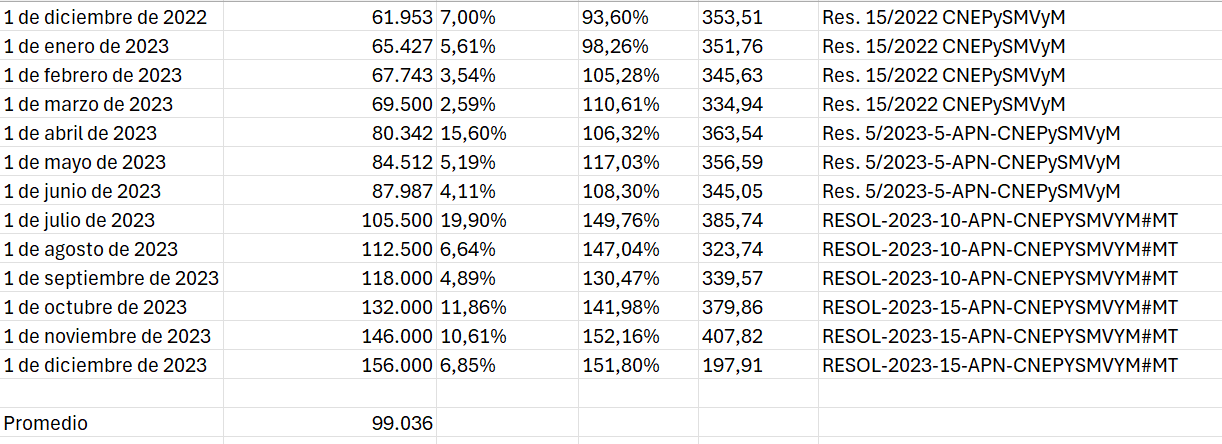

<ipython-input-280-7b1305b8c957>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_df_lang_and_salarios_filtrados, y='programming_language', x='salary_monthly_NETO',palette=palette)


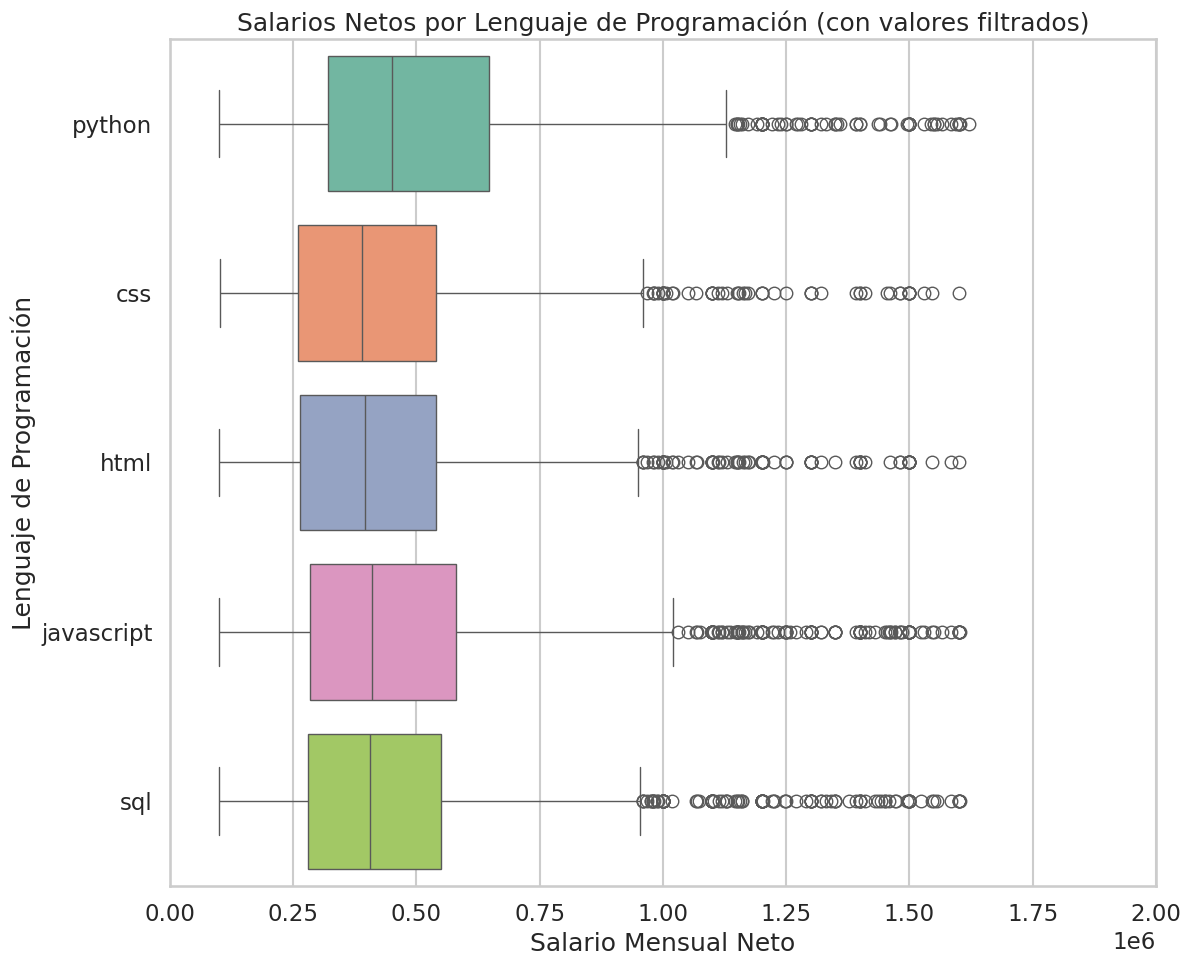

In [ ]:
# Filtrar el DataFrame para incluir solo los lenguajes de programación más frecuentes y salarios dentro de los límites
filtered_df_lang_and_salarios_filtrados = filtered_df_lang[(filtered_df_lang['programming_language'].isin(interesting_languages)) &
                                                          (filtered_df_lang['salary_monthly_NETO'] >= salario_minimo) &
                                                          (filtered_df_lang['salary_monthly_NETO'] <= salario_maximo)]
# Seleccionar una paleta de colores
palette = "Set2"  # Puedes elegir cualquier paleta de colores de Seaborn

# Establecer el estilo de seaborn
sns.set_style("whitegrid")

# Crear el gráfico de boxplot horizontal con los datos filtrados
plt.figure(figsize=(12, 10))
sns.boxplot(data=filtered_df_lang_and_salarios_filtrados, y='programming_language', x='salary_monthly_NETO',palette=palette)

# Agregar título y etiquetas a los ejes
plt.title('Salarios Netos por Lenguaje de Programación (con valores filtrados)')
plt.xlabel('Salario Mensual Neto')
plt.ylabel('Lenguaje de Programación')

# Mostrar el gráfico
plt.tight_layout()
plt.xlim(0, 2000000)
plt.show()


# **8) Estadistica Descriptiva**

In [ ]:
# Filtrar el DataFrame para incluir solo los cinco lenguajes de programación más frecuentes y salarios dentro de los límites
filtered_df_lang_and_salarios_filtrados = filtered_df_lang[(filtered_df_lang['programming_language'].isin(interesting_languages)) &
                                                          (filtered_df_lang['salary_monthly_NETO'] >= salario_minimo) &
                                                          (filtered_df_lang['salary_monthly_NETO'] <= salario_maximo)]

# Agrupar el DataFrame filtrado por lenguaje de programación
grouped_by_language = filtered_df_lang_and_salarios_filtrados.groupby('programming_language')

# Calcular medidas de resumen para cada grupo
summary_stats = grouped_by_language['salary_monthly_NETO'].describe()

# Mostrar las medidas de resumen
print("Medidas de resumen para los cinco lenguajes de programación más frecuentes:")
print(summary_stats)


Medidas de resumen para los cinco lenguajes de programación más frecuentes:
                       count      mean       std       min       25%  \
programming_language                                                   
css                   916.00 447792.18 271393.91 101560.00 260000.00   
html                 1367.00 451010.99 270132.63  99877.00 264227.50   
javascript           1876.00 481494.93 296081.57 100000.00 284802.50   
python               1344.00 518225.65 289021.24 100000.00 320000.00   
sql                  2133.00 458161.36 263307.82  99600.00 279318.00   

                           50%       75%        max  
programming_language                                 
css                  390000.00 540000.00 1600000.00  
html                 396000.00 540000.00 1600000.00  
javascript           410000.00 580000.00 1603000.00  
python               450000.00 647511.50 1620000.00  
sql                  407000.00 550000.00 1603000.00  


Podemos observar como se reducen la cantidad de datos tras el filtrado por salarios netos en cada lenguaje. Ejemplo, para el lenguaje css se filtran 152 valores extremos (1068 - 916)

Tabla pre filtrado:
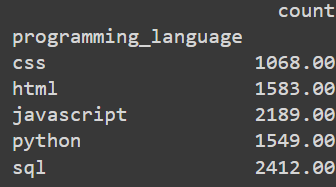
Tabla post filtrado:
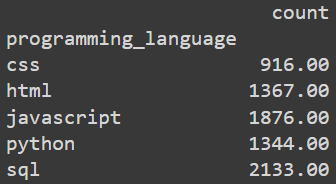

# **9) Visualización, Descriptivos finales y Conclusión**

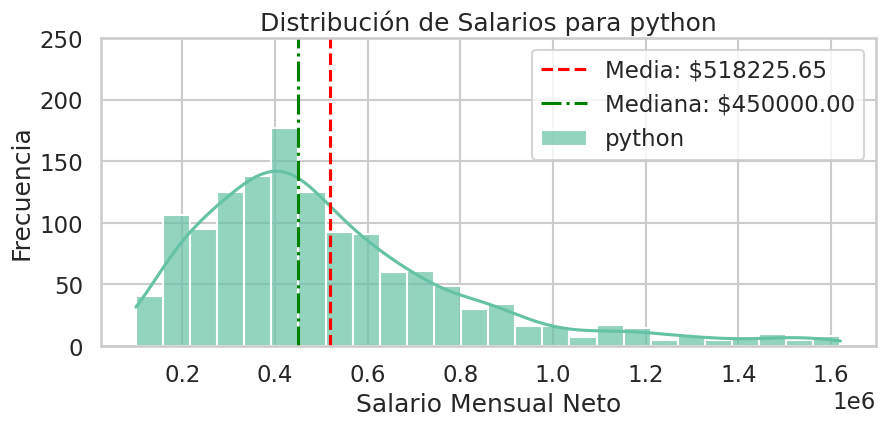

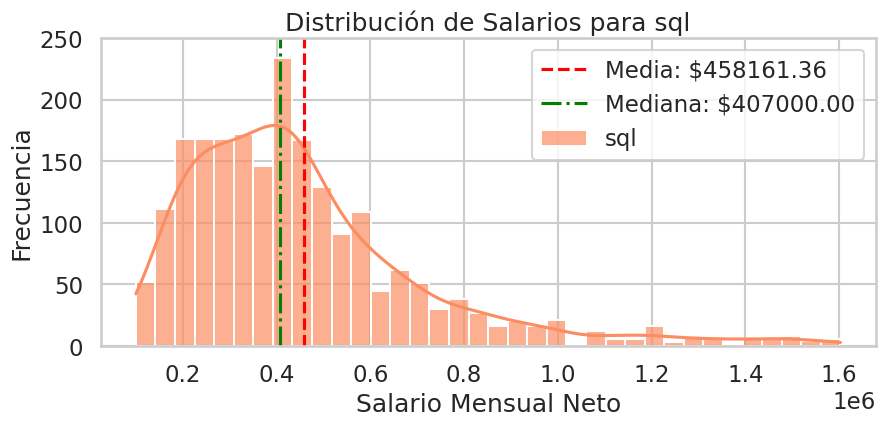

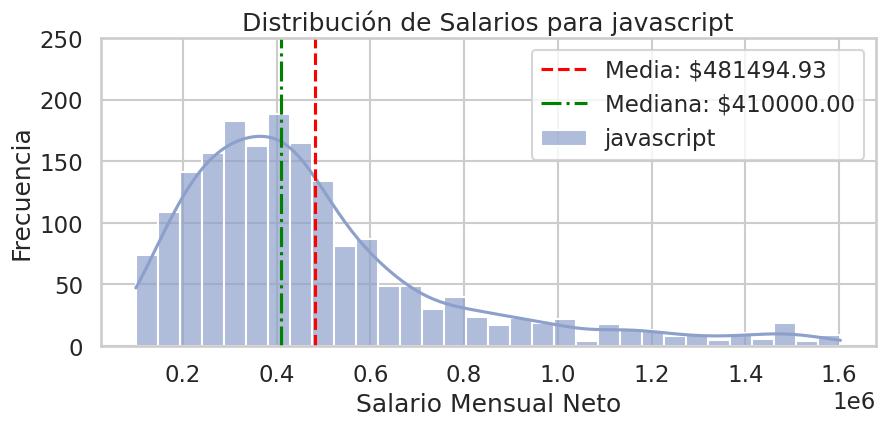

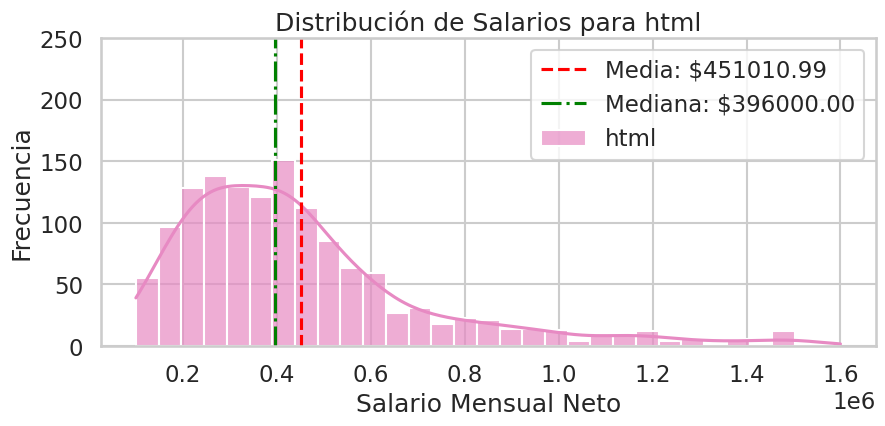

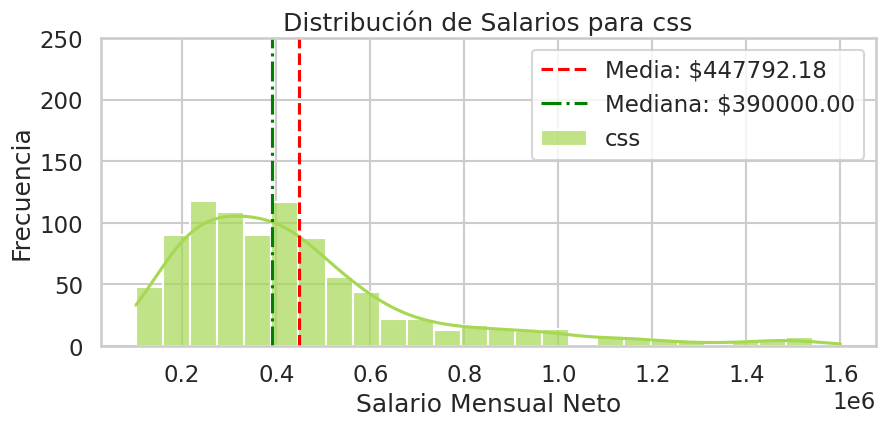

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Definir una paleta de colores con tantos colores como lenguajes de programación
colors = sns.color_palette("Set2", n_colors=len(interesting_languages))

# Encontrar el máximo valor de frecuencia entre todos los lenguajes de programación
max_frequency = filtered_df_lang_and_salarios_filtrados.groupby('programming_language')['salary_monthly_NETO'].count().max()

# Crear un histograma para cada lenguaje de programación
for idx, language in enumerate(interesting_languages):
    # Filtrar los datos para el lenguaje actual
    data_language = filtered_df_lang_and_salarios_filtrados[filtered_df_lang_and_salarios_filtrados['programming_language'] == language]

    # Crear una nueva figura para cada gráfico
    plt.figure(figsize=(10, 4))

    # Crear el histograma con el color correspondiente
    sns.histplot(data=data_language, x='salary_monthly_NETO', kde=True, label=language, alpha=0.7, color=colors[idx])

    # Calcular la media y la mediana
    mean_salary = data_language['salary_monthly_NETO'].mean()
    median_salary = data_language['salary_monthly_NETO'].median()

    # Dibujar líneas verticales para la media y la mediana
    plt.axvline(x=mean_salary, color='r', linestyle='--', label=f'Media: ${mean_salary:.2f}')
    plt.axvline(x=median_salary, color='g', linestyle='-.', label=f'Mediana: ${median_salary:.2f}')

    # Establecer los límites del eje y
    plt.ylim(0, 250)

    # Agregar título y etiquetas a los ejes
    plt.title(f'Distribución de Salarios para {language}')
    plt.xlabel('Salario Mensual Neto')
    plt.ylabel('Frecuencia')

    # Mostrar la leyenda
    plt.legend()

    # Mostrar el gráfico actual
    plt.show()


Se puede observar que la distribución de los valores de salario neto por lenjuage de programación tiene un comportamiento similar, con una cola larga hacia la derecha (sesgo positivo), lo que implica que la media tenga un valor mayor que la mediana.

<ipython-input-283-a22817ad1d2b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_salaries.index, y=median_salaries.values, palette='Set3')


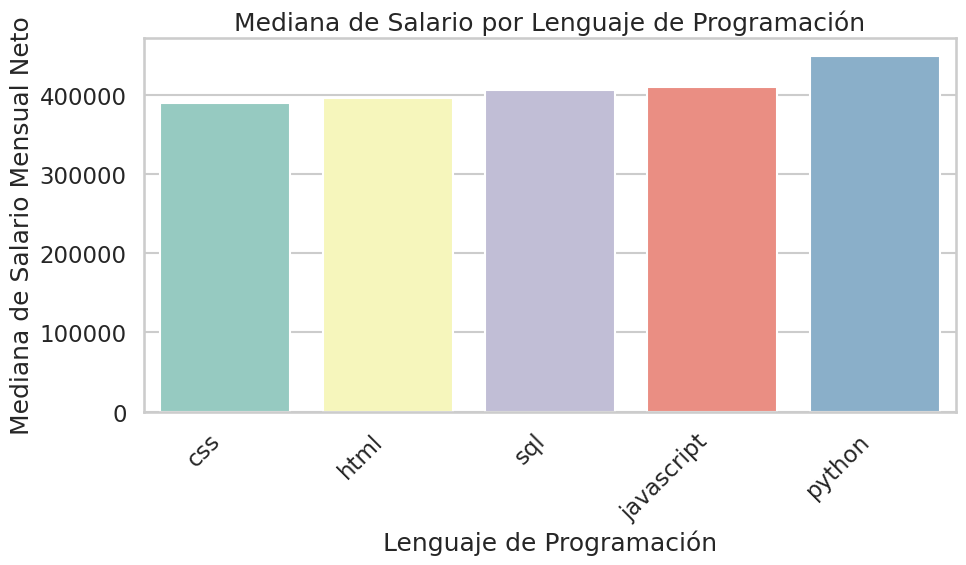

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la mediana del salario para cada lenguaje de programación
median_salaries = filtered_df_lang_and_salarios_filtrados.groupby('programming_language')['salary_monthly_NETO'].median().sort_values()

# Visualizar las medianas de salario para cada lenguaje de programación
plt.figure(figsize=(10, 6))
sns.barplot(x=median_salaries.index, y=median_salaries.values, palette='Set3')
plt.title('Mediana de Salario por Lenguaje de Programación')
plt.xlabel('Lenguaje de Programación')
plt.ylabel('Mediana de Salario Mensual Neto')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


En el anterior gráfico de barras podemos observar el valor de la mediana de Salarios Netos para cada lenguajes de los cinco más frecuentes, donde  las personas que trabajan con Phyton tiene un salario Neto mayor.
Utilizamos la mediana ya que la media es más suceptible a valores muy altos (sesgo positivo).

Sin embargo, es importante recordar que el lenguaje más utilizado es SQL, el cual se encuentra en tercer lugar si tenemos en cuenta la mediana de los salarios netos.

In [ ]:
# Calcular la mediana general de los salarios netos
median_salary_overall = filtered_df_lang_and_salarios_filtrados['salary_monthly_NETO'].median()

# Calcular la mediana de los salarios netos para cada lenguaje de programación
median_salaries_by_language = filtered_df_lang_and_salarios_filtrados.groupby('programming_language')['salary_monthly_NETO'].median()

# Inicializar un diccionario para almacenar las probabilidades por lenguaje
probability_by_language = {}

# Calcular la probabilidad de ganar más que la mediana general para cada lenguaje de programación
for language in interesting_languages:
    # Filtrar los datos para el lenguaje actual
    filtered_data_language = filtered_df_lang_and_salarios_filtrados[filtered_df_lang_and_salarios_filtrados['programming_language'] == language]

    # Calcular la probabilidad para el lenguaje actual
    probability_by_language[language] = (filtered_data_language['salary_monthly_NETO'] > median_salary_overall).mean()

# Calcular el promedio de las probabilidades para cada lenguaje de programación
average_probability_by_language = sum(probability_by_language.values()) / len(probability_by_language)

print("Mediana general de salario neto:", median_salary_overall)
print("\nMediana de salario neto por lenguaje de programación:")
print(median_salaries_by_language)
print("\nProbabilidad de ganar más que la mediana general por lenguaje de programación:")
print(probability_by_language)



Mediana general de salario neto: 410000.0

Mediana de salario neto por lenguaje de programación:
programming_language
css          390000.00
html         396000.00
javascript   410000.00
python       450000.00
sql          407000.00
Name: salary_monthly_NETO, dtype: float64

Probabilidad de ganar más que la mediana general por lenguaje de programación:
{'python': 0.5877976190476191, 'sql': 0.4903891233005157, 'javascript': 0.4973347547974414, 'html': 0.46525237746891, 'css': 0.44868995633187775}




Probabilidad en porcentaje de ganar más que la mediana general por lenguaje de programación:
1.   Python: 58.78 %
2.   Javascript: 49.73 %
3.   Sql: 49.04 %
4.   Html: 46.52 %
5.   Css: 44.87 %

**Conclusión**

A partir de lo analisis anteriores podemos concluir que las personas que trabajan con Phyton, tiene mayor probabilidad (58.8%) de tener un salario neto mayor a la mediana general, son quienes tienen mayor mediana respecto a los otros cuatro lenguajes, pero sin embargo la frecuencia de personas que lo utilizan se encuentra en cuarto lugar.

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones.

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




In [ ]:
df.columns
#Para ver el nombre todas las columnas, para luego evaluar si hay que cambiar nombre y seleccionar columnas de interes

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'salary_in_usd', 'salary_last_dollar_value', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       '¿En qué mes fue el último ajuste?', 'salary_comparison_last_semester',
       '¿Contás con beneficios adicionales?', 'salary_satisfaction',
       'Trabajo de', 'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'tools_platform', 'tools_programming_languages', 'tools_frameworks',
       'tools_data_bases', 'tools_qa_testing', 'company_employee_number',
       'work_work_modality',
       'Si trabajás bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended',
       '¿Qué tanto estás usando Copilot, ChatGPT u otras herramientas de IA para tu trabajo?

Un heatmap, o mapa de calor, es una visualización que utiliza colores para representar valores numéricos en una matriz de datos. Se utiliza principalmente para visualizar la densidad de puntos en una matriz y revelar patrones o relaciones dentro de los datos.

<Axes: >

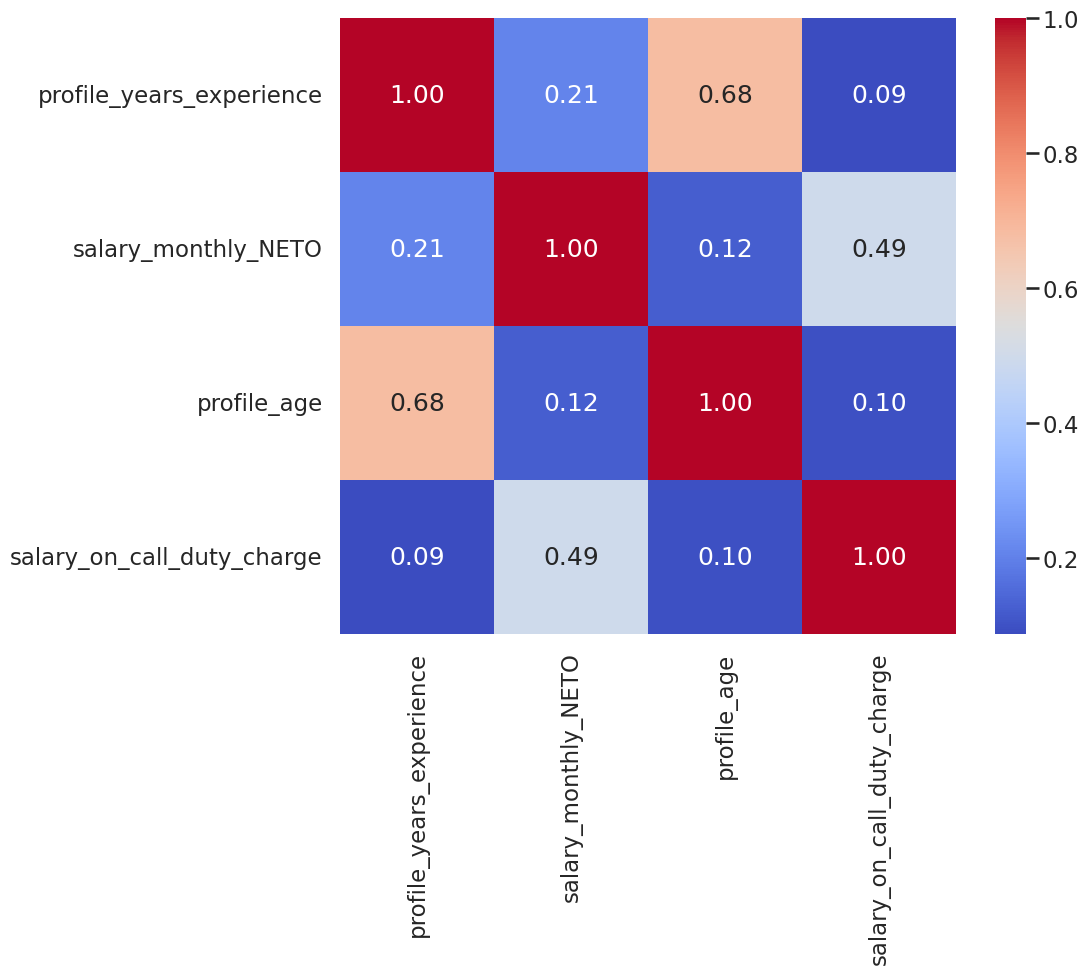

In [ ]:
df = df[df['profile_age'] <= 50]
relevants_columns2=['profile_years_experience','salary_monthly_NETO','profile_age', 'salary_on_call_duty_charge']
df_numeric = df[relevants_columns2]._get_numeric_data()
corr = df_numeric.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

Observamos un patrón que sugiere una correlación entre estar de guardia y cobrar mayores salarios.

También como es de esperar, los años de experiencia tienen una correlación positiva con la edad de las personas (filtradas con menor de 50 años para establece un límite de edad para eliminar respuesta erroneas como 455 años)

In [ ]:
# complete here if you want to include more columns;
# Tres variables numéricas: salary_monthly_NETO , profile_years_experience y profile_age
# dos variables categóricas: work_province y work_dedication
relevant_columns_2 = ['salary_monthly_NETO', 'profile_years_experience', 'profile_age', 'work_province', 'work_dedication']

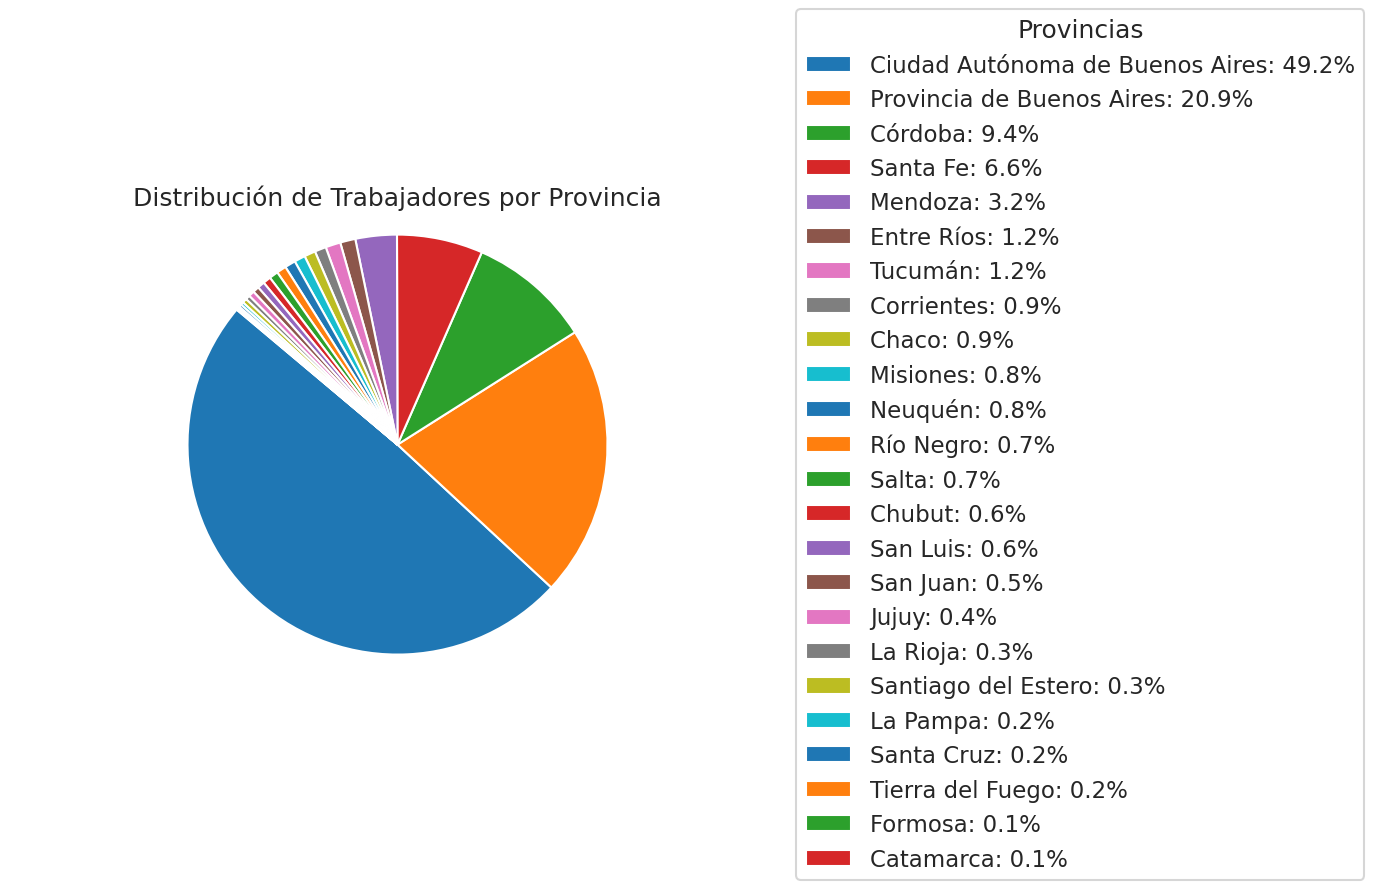

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde la URL
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

# Contar el número de trabajadores en cada provincia
province_counts = df['work_province'].value_counts()

# Calcular los porcentajes
percentages = 100 * province_counts / len(df)

# Crear el gráfico de pastel
plt.figure(figsize=(10, 6))
patches, texts = plt.pie(province_counts, startangle=140)

# Ajustar aspecto para que el pastel sea un círculo
plt.axis('equal')

# Agregar título
plt.title('Distribución de Trabajadores por Provincia')

# Crear leyenda con nombre de la provincia y porcentaje
legend_labels = [f'{province}: {percentage:.1f}%' for province, percentage in zip(province_counts.index, percentages)]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Provincias')

# Mostrar el gráfico de pastel
plt.show()


Este gráfico de torta nos representa el porcentaje de respuestas por provincias, donde podemos observar que la encuesta se realizó en el total de provincias argentinas, pero las mayores personas encuestadas trabajan en CABA, provincia de Bs.As., Córdoba y Santa Fe; coincidentemente con las provincias con mayor cantidad de habitantes.

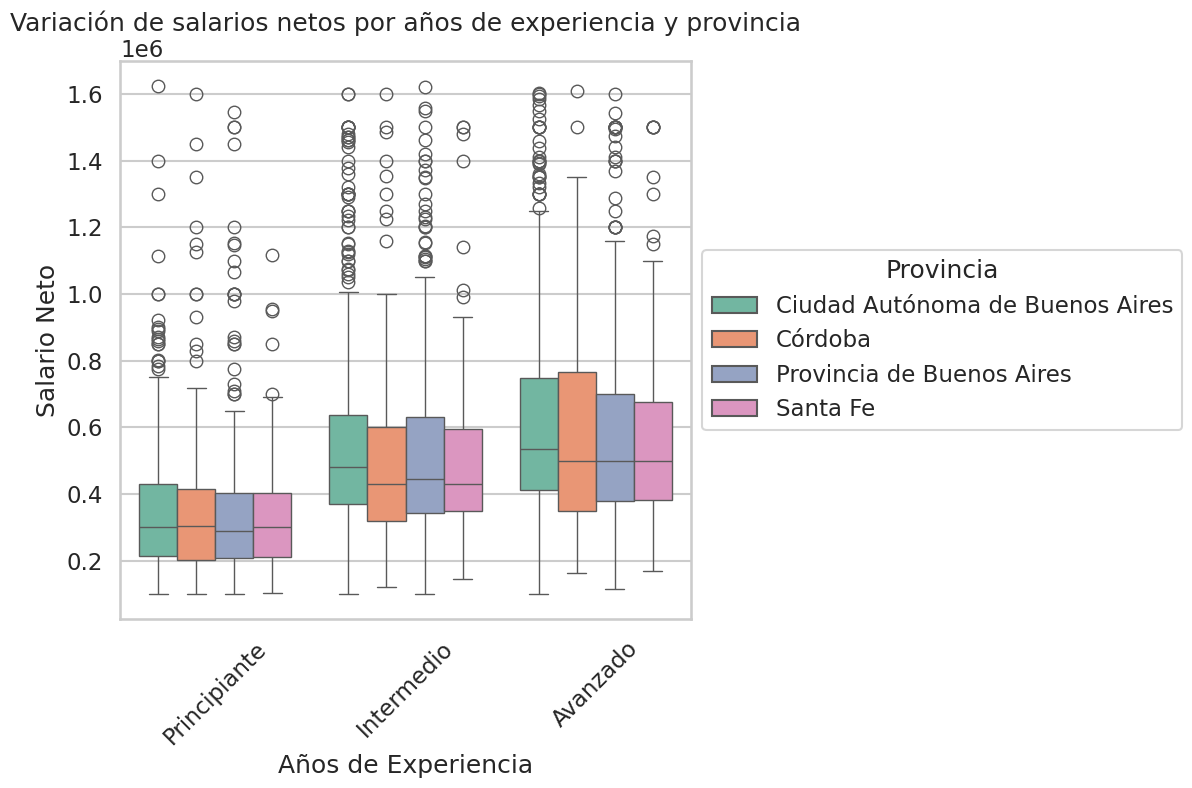

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

# Filtrar salarios dentro del rango deseado
salarios_filtrados = df[(df['salary_monthly_NETO'] >= 99036) & (df['salary_monthly_NETO'] <= df['salary_monthly_NETO'].quantile(0.95))].copy()

# Dividir los salarios netos en 3 grupos
salarios_filtrados['salary_group'] = pd.qcut(salarios_filtrados['salary_monthly_NETO'], q=3, labels=['Bajo', 'Medio', 'Alto'])

# Dividir los años de experiencia en 3 grupos
salarios_filtrados['experience_group'] = pd.qcut(salarios_filtrados['profile_years_experience'], q=3, labels=['Principiante', 'Intermedio', 'Avanzado'])

# Encontrar las cuatro provincias más frecuentes
provincias_frecuentes = salarios_filtrados['work_province'].value_counts().head(4).index.tolist()

# Filtrar el DataFrame para incluir solo las cuatro provincias más frecuentes
salarios_provincias_frecuentes = salarios_filtrados[salarios_filtrados['work_province'].isin(provincias_frecuentes)]

# Crear el gráfico de caja
plt.figure(figsize=(12, 8))
sns.boxplot(x='experience_group', y='salary_monthly_NETO', hue='work_province', data=salarios_provincias_frecuentes, palette='Set2')
plt.title('Variación de salarios netos por años de experiencia y provincia')
plt.xlabel('Años de Experiencia')
plt.ylabel('Salario Neto')
plt.xticks(rotation=45)

#  rangos de años
# 'Principiante: 0-2 años'
# 'Intermedio: 2-5 años',
#  'Avanzado: >5 años',

# Mover la leyenda de las provincias al costado derecho del gráfico
plt.legend(title='Provincia', loc='center left', bbox_to_anchor=(1, 0.5))

# Agregar leyenda para los rangos de años al costado derecho del gráfico
plt.legend(title='Provincia', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


Este gráficos nos permite confirmar que a mayor cantidad de años de experiencia (Intermedio, 2-5 años;  y avanzado >5 años) se perciben salarios netos mayores que personas principiantes (0-2 años).

En aquellas personas principiantes, los salarios netos percibidos fueron similares independientemente de zona geografica. Sin embargo, los trabajadores de CABA, con mayor experiencia, perciben salarios netos mayores que los trabajadores de kas otras tres provincias a igual años de experiencia.

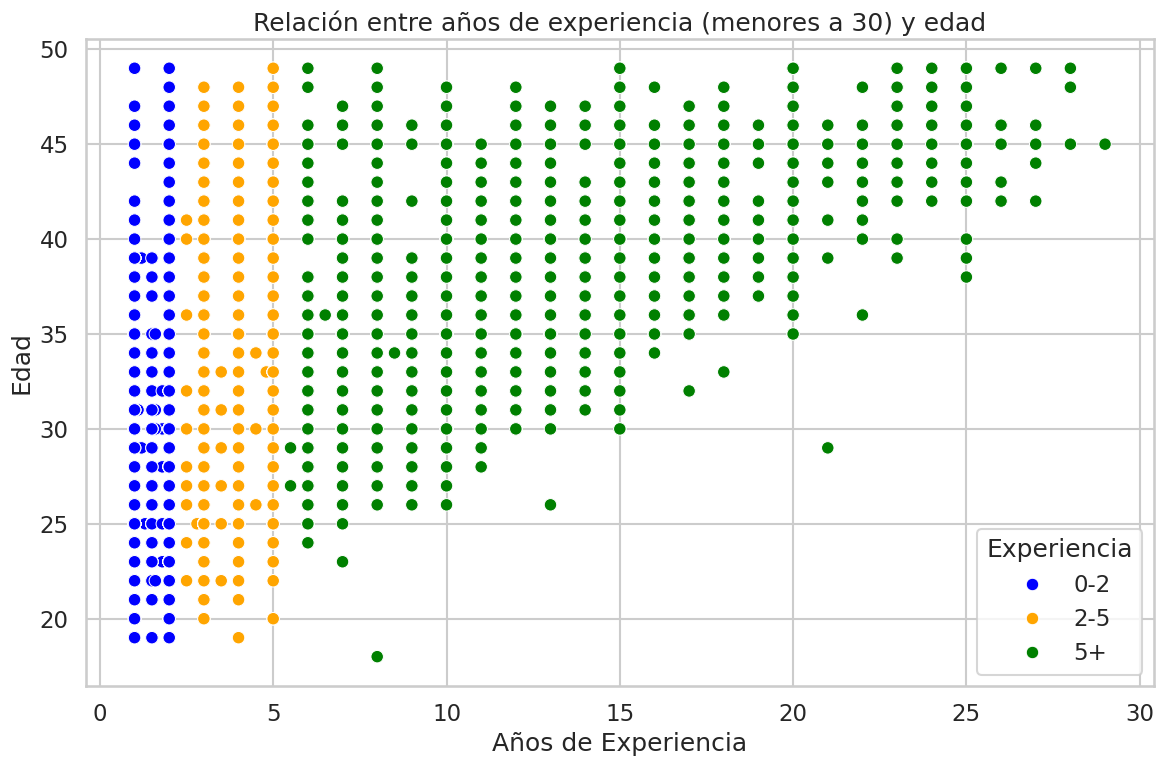

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

# Filtrar personas menores de 50 años y con años de experiencia menor a 30
df_filtrado = df[(df['profile_age'] < 50) & (df['profile_years_experience'] < 30)].copy()

# Definir los límites de los grupos de años de experiencia
bins = [0, 2, 5, float('inf')]
labels = ['0-2', '2-5', '5+']

# Dividir los años de experiencia en tres grupos
df_filtrado['experience_group'] = pd.cut(df_filtrado['profile_years_experience'], bins=bins, labels=labels)

# Dividir las edades en tres grupos
df_filtrado['age_group'] = pd.cut(df_filtrado['profile_age'], bins=3, labels=['Joven', 'Adulto Joven', 'Adulto'])

# Mapeo de los grupos de experiencia a colores
palette = {'0-2': 'blue', '2-5': 'orange', '5+': 'green'}

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_filtrado, x='profile_years_experience', y='profile_age', hue='experience_group', palette=palette)

plt.title('Relación entre años de experiencia (menores a 30) y edad')
plt.xlabel('Años de Experiencia')
plt.ylabel('Edad')

plt.legend(title='Experiencia')

plt.tight_layout()
plt.show()


Podemos observar en corcordancia con el heat map que a mayor edad hay mayor cantidad de personas con mas experiencia.
Por otro lado, los menores de 25 años en su mayoria tienen menos de 5 años de experiencia como es de esperar.
Las personas con experiencia principiante e intermedio (azul y amarillo) tienen una frecuencia similar en todo el rango etario.

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



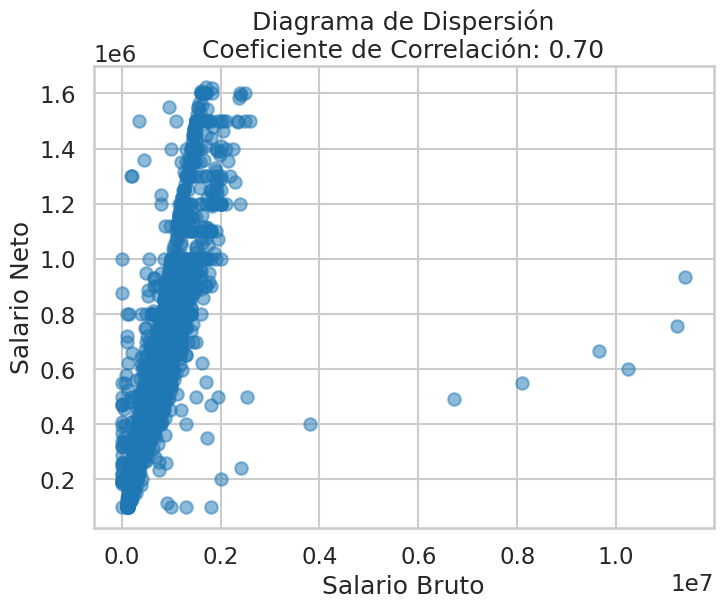

Coeficiente de Correlación: 0.70


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde la URL
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

# Definir el salario mínimo y máximo
min_salary = 99360
max_salary = df['salary_monthly_NETO'].quantile(0.95)

# Filtrar los datos para incluir únicamente los salarios dentro del rango deseado
filtered_df = df[(df['salary_monthly_NETO'] >= min_salary) & (df['salary_monthly_NETO'] <= max_salary)]

# Calcular el coeficiente de correlación entre el salario bruto y el salario neto en los datos filtrados
correlation = filtered_df['salary_monthly_BRUTO'].corr(filtered_df['salary_monthly_NETO'])

# Visualizar la relación entre el salario bruto y el salario neto en un diagrama de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(filtered_df['salary_monthly_BRUTO'], filtered_df['salary_monthly_NETO'], alpha=0.5)
plt.xlabel('Salario Bruto')
plt.ylabel('Salario Neto')
plt.title(f'Diagrama de Dispersión\nCoeficiente de Correlación: {correlation:.2f}')
plt.grid(True)
plt.show()

print(f'Coeficiente de Correlación: {correlation:.2f}')


Este grafico nos permite visualizar la relación entre las dos variables seleccionadas lo que admite dos conclusiones
1.   Existe correlación entre ambas variables de 0.7.
     Se observa una relación positiva.
2.   Observamos ciertos puntos que se dispersan de la tendencia central de la correlación, por efecto de valores extremos del salario bruto.

En un futuro análisis podriamos filtrar esos valores extremos de salario bruto y re-analizar la correlación entre las variables.


## c) Densidad condicional

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






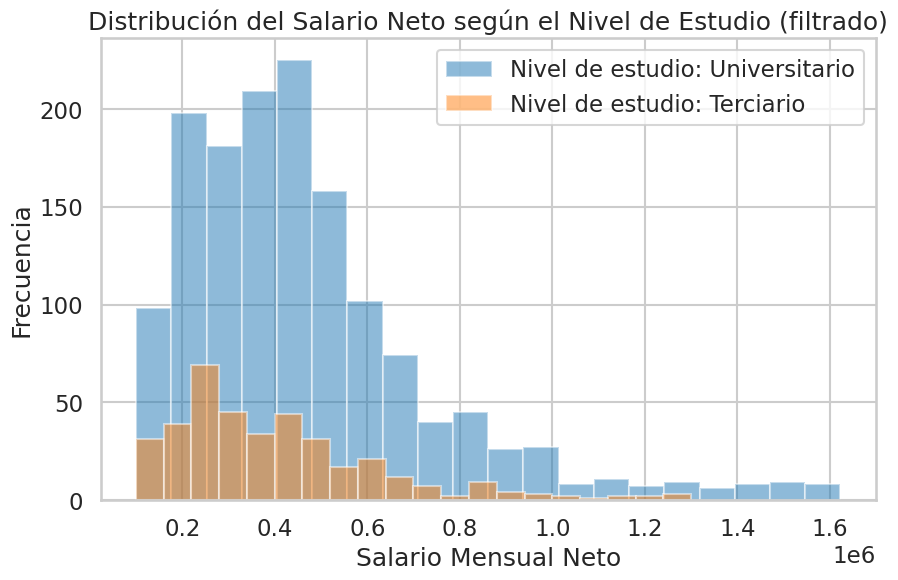


Medidas de centralización y dispersión para el nivel de estudio 'Universitario' (filtrado):
---------------------------------------------------------
Media: 468912.89692891645
Mediana: 417000.0
Desviación estándar: 270797.5831794503
Rango intercuartil (IQR): 285000.0

Medidas de centralización y dispersión para el nivel de estudio 'Terciario' (filtrado):
---------------------------------------------------------
Media: 400937.3465343916
Mediana: 350000.0
Desviación estándar: 225298.29115847292
Rango intercuartil (IQR): 258840.5


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde la URL
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

# Definir el salario mínimo y máximo
min_salary = 99360
max_salary = df['salary_monthly_NETO'].quantile(0.95)

# Filtrar los datos del salario neto dentro del rango deseado
filtered_df = df[(df['salary_monthly_NETO'] >= min_salary) & (df['salary_monthly_NETO'] <= max_salary)]

# Seleccionar dos subpoblaciones numerosas según el nivel de estudio en los datos filtrados
education_levels = filtered_df['profile_studies_level'].value_counts().index[:2]
subpopulations = [filtered_df[filtered_df['profile_studies_level'] == level] for level in education_levels]

# Graficar histogramas comparativos para cada subpoblación
plt.figure(figsize=(10, 6))
for i, subpopulation in enumerate(subpopulations, 1):
    plt.hist(subpopulation['salary_monthly_NETO'], bins=20, alpha=0.5, label=f'Nivel de estudio: {education_levels[i-1]}')

# Añadir etiquetas y título
plt.xlabel('Salario Mensual Neto')
plt.ylabel('Frecuencia')
plt.title('Distribución del Salario Neto según el Nivel de Estudio (filtrado)')
plt.legend()
plt.grid(True)
plt.show()

# Calcular medidas de centralización y dispersión para cada subpoblación
for i, subpopulation in enumerate(subpopulations, 1):
    print(f"\nMedidas de centralización y dispersión para el nivel de estudio '{education_levels[i-1]}' (filtrado):")
    print("---------------------------------------------------------")
    print("Media:", subpopulation['salary_monthly_NETO'].mean())
    print("Mediana:", subpopulation['salary_monthly_NETO'].median())
    print("Desviación estándar:", subpopulation['salary_monthly_NETO'].std())
    print("Rango intercuartil (IQR):", subpopulation['salary_monthly_NETO'].quantile(0.75) - subpopulation['salary_monthly_NETO'].quantile(0.25))


Al analizar este gráfico de barras observamos que a mayor nivel educativo se perciben salarios netos mas áltos. Observamos que los salrios netos más altos solo perciebn con nivel educativo universitario. Como es de esperar la frecuencia de  estos salarios más alto es baja.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica.
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


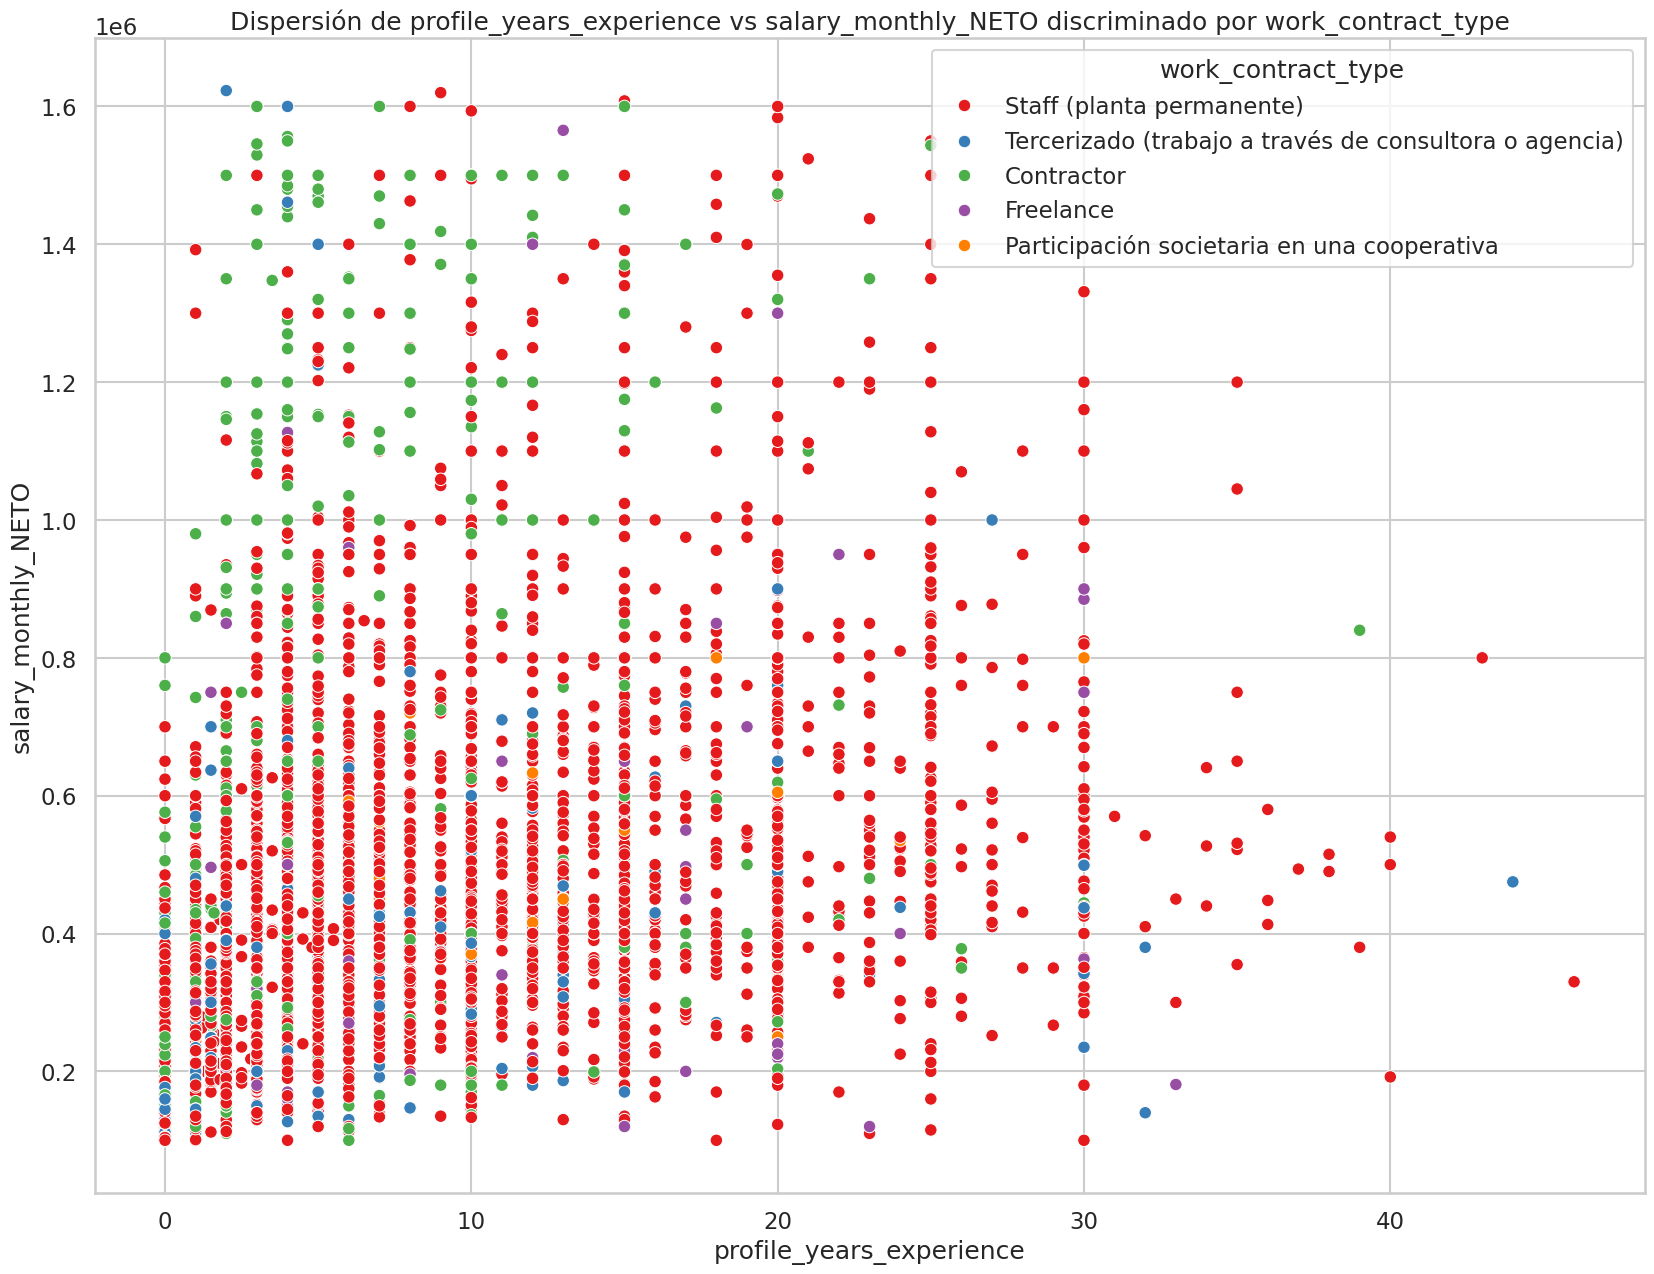

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde la URL
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

# Definir el salario mínimo y máximo
min_salary = 99360
max_salary = df['salary_monthly_NETO'].quantile(0.95)

# Filtrar los datos del salario neto dentro del rango deseado
filtered_df = df[(df['salary_monthly_NETO'] >= min_salary) & (df['salary_monthly_NETO'] <= max_salary)]

# Seleccionar las variables numéricas y categórica
numeric_var1 = 'profile_years_experience'
numeric_var2 = 'salary_monthly_NETO'
categorical_var = 'work_contract_type'

# Graficar el scatter plot discriminando por la variable categórica
plt.figure(figsize=(20, 15))
sns.scatterplot(data=filtered_df, x=numeric_var1, y=numeric_var2, hue=categorical_var, palette='Set1')
plt.title(f'Dispersión de {numeric_var1} vs {numeric_var2} discriminado por {categorical_var}')
plt.xlabel(numeric_var1)
plt.ylabel(numeric_var2)
plt.legend(title=categorical_var)
plt.grid(True)
plt.show()


En el scatter plott observamos que los contratados tienen salarios que se ubican en los valores extremos (max y min).
Por otro lado se observa que el tipo de contratatación más frecuente es el de planta permanente. A mayor número de años de experiencia se observa menos frecuencia de salarios elevados y la mayoría son planta permanente.
